In [1]:
import pandas as pd
from sklearn.linear_model import Lasso  # 导入Lasso回归
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_excel('./data/USA_ROU.xlsx', engine='openpyxl')

df['coach_change'] = df.apply(lambda row: 1 if (row['NOC'] == 'USA' and row['YEAR'] >= 1981) or (
            row['NOC'] == 'ROU' and row['YEAR'] >= 1981) else 0, axis=1)

df['gold_count'] = df['GOLD']  # 只使用金牌数
df.head()

,YEAR,NOC,SPORT,EVENT,MEDAL,GOLD,SILVER,BRONZE,TOTAL,HOST,DISCIPLINE,CODE,SPORTS GOVERNING BODY,COUNT,coach_change,gold_count
0,1952,ROU,gymnastics,Gymnastics Women's Team All-Around,No medal,1,1,2,4,FIN,Artistic,GAR,FIG,15,0,1
1,1952,ROU,gymnastics,Gymnastics Women's Team All-Around,No medal,1,1,2,4,FIN,Rhythmic,GRY,FIG,0,0,1
2,1952,ROU,gymnastics,Gymnastics Women's Team All-Around,No medal,1,1,2,4,FIN,Trampoline,GTR,FIG,0,0,1
3,2008,ROU,gymnastics,Gymnastics Women's Team All-Around,Bronze,4,1,4,9,CHN,Artistic,GAR,FIG,14,1,4
4,2008,ROU,gymnastics,Gymnastics Women's Team All-Around,Bronze,4,1,4,9,CHN,Rhythmic,GRY,FIG,2,1,4


In [3]:
print(f"Unique NOC values: {df['NOC'].unique()}")

df_usa = df[df['NOC'] == 'USA']
df_rou = df[df['NOC'] == 'ROU']

print(f"Number of USA records: {df_usa.shape[0]}")
print(f"Number of Romania records: {df_rou.shape[0]}")
if df_rou.shape[0] == 0:
    print("Warning: No data for Romania (NOC == 'ROU')")

Unique NOC values: ['ROU' 'USA']
Number of USA records: 339
Number of Romania records: 273


In [4]:
def prepare_data(df):
    X = pd.get_dummies(df[['coach_change', 'YEAR', 'NOC']], drop_first=True)  # 将分类变量进行独热编码
    y = df['gold_count']  # 使用金牌数作为因变量
    # 数据标准化
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled, y

In [5]:
if df_usa.shape[0] > 0:
    X_usa, y_usa = prepare_data(df_usa)
else:
    X_usa, y_usa = None, None

if df_rou.shape[0] > 0:
    X_rou, y_rou = prepare_data(df_rou)
else:
    X_rou, y_rou = None, None

X_rou,y_rou

(array([[-1.03352882, -1.58729616],
        [-1.03352882, -1.58729616],
        [-1.03352882, -1.58729616],
        [ 0.96755889,  1.382183  ],
        [ 0.96755889,  1.382183  ],
        [ 0.96755889,  1.382183  ],
        [ 0.96755889,  0.10954907],
        [ 0.96755889,  0.10954907],
        [ 0.96755889,  0.10954907],
        [ 0.96755889,  0.74586604],
        [ 0.96755889,  0.74586604],
        [ 0.96755889,  0.74586604],
        [ 0.96755889,  0.95797169],
        [ 0.96755889,  0.95797169],
        [ 0.96755889,  0.95797169],
        [-1.03352882, -1.58729616],
        [-1.03352882, -1.58729616],
        [-1.03352882, -1.58729616],
        [ 0.96755889,  1.17007734],
        [ 0.96755889,  1.17007734],
        [ 0.96755889,  1.17007734],
        [-1.03352882, -1.58729616],
        [-1.03352882, -1.58729616],
        [-1.03352882, -1.58729616],
        [ 0.96755889,  0.95797169],
        [ 0.96755889,  0.95797169],
        [ 0.96755889,  0.95797169],
        [ 0.96755889,  0.533

In [6]:
if X_usa is not None and X_rou is not None:
    # 划分训练集和测试集
    X_usa_train, X_usa_test, y_usa_train, y_usa_test = train_test_split(X_usa, y_usa, test_size=0.2, random_state=42)
    X_rou_train, X_rou_test, y_rou_train, y_rou_test = train_test_split(X_rou, y_rou, test_size=0.2, random_state=42)

    # 使用Lasso回归进行建模
    lasso_model_usa = Lasso(alpha=0.1)  # Lasso回归，alpha为正则化参数，可以调节
    lasso_model_usa.fit(X_usa_train, y_usa_train)

    lasso_model_rou = Lasso(alpha=0.1)  # Lasso回归，alpha为正则化参数，可以调节
    lasso_model_rou.fit(X_rou_train, y_rou_train)

    # 预测
    y_usa_pred = lasso_model_usa.predict(X_usa_test)
    y_rou_pred = lasso_model_rou.predict(X_rou_test)

    mse_usa = mean_squared_error(y_usa_test, y_usa_pred)
    mse_rou = mean_squared_error(y_rou_test, y_rou_pred)

    print("USA Model:")
    print("Coefficients:", lasso_model_usa.coef_)
    print("Intercept:", lasso_model_usa.intercept_)

    print("\nRomania Model:")
    print("Coefficients:", lasso_model_rou.coef_)
    print("Intercept:", lasso_model_rou.intercept_)

    print("\nCoach Change Effect Comparison:")
    print(f"USA coach change effect: {lasso_model_usa.coef_[0]}")
    print(f"Romania coach change effect: {lasso_model_rou.coef_[0]}")
else:
    print("Error: No data for either USA or Romania.")


USA Model:
Coefficients: [10.32848944 -3.38749103]
Intercept: 37.7996494968485

Romania Model:
Coefficients: [ 3.84459308 -1.70610293]
Intercept: 5.371425061231537

Coach Change Effect Comparison:
USA coach change effect: 10.328489444137245
Romania coach change effect: 3.84459307661466


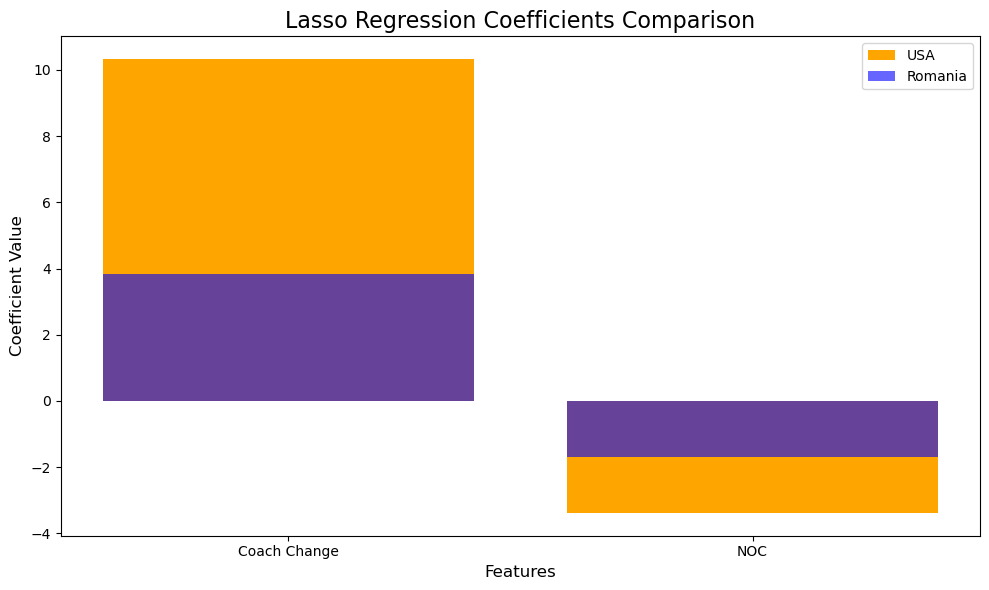

In [8]:
# 获取Lasso模型的系数
coef_usa = lasso_model_usa.coef_
coef_rou = lasso_model_rou.coef_

# 画出系数条形图
features = ['Coach Change', 'NOC']  # 相关特征

plt.figure(figsize=(10, 6))
plt.bar(features, coef_usa, color='orange', label='USA')
plt.bar(features, coef_rou, color='blue', label='Romania', alpha=0.6)

plt.title('Lasso Regression Coefficients Comparison', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Coefficient Value', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

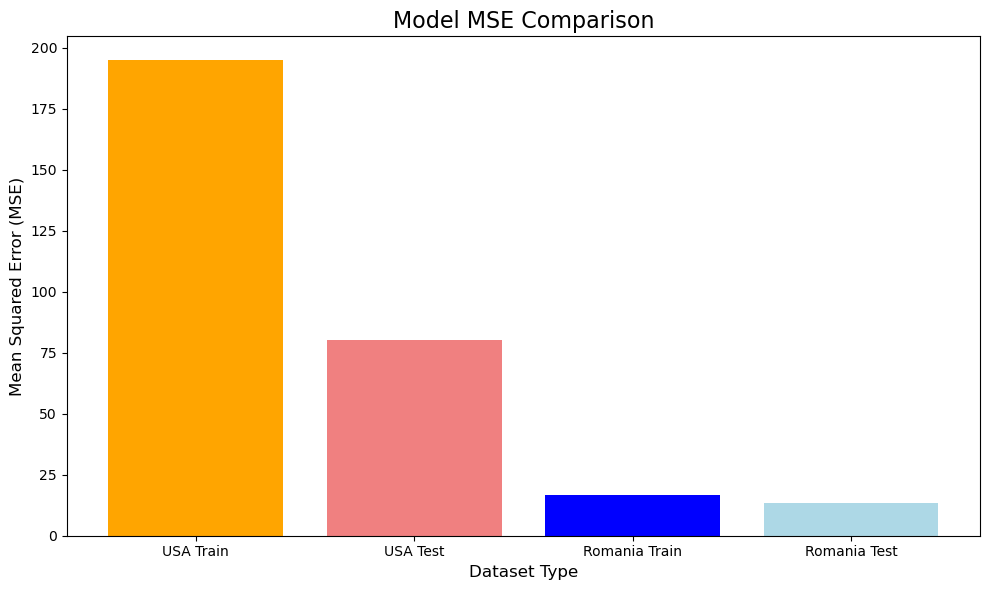

In [9]:
# 绘制训练集和测试集的MSE
mse_usa_train = mean_squared_error(y_usa_train, lasso_model_usa.predict(X_usa_train))
mse_usa_test = mean_squared_error(y_usa_test, y_usa_pred)

mse_rou_train = mean_squared_error(y_rou_train, lasso_model_rou.predict(X_rou_train))
mse_rou_test = mean_squared_error(y_rou_test, y_rou_pred)

# 绘制MSE条形图
labels = ['USA Train', 'USA Test', 'Romania Train', 'Romania Test']
mse_values = [mse_usa_train, mse_usa_test, mse_rou_train, mse_rou_test]

plt.figure(figsize=(10, 6))
plt.bar(labels, mse_values, color=['orange', 'lightcoral', 'blue', 'lightblue'])
plt.title('Model MSE Comparison', fontsize=16)
plt.xlabel('Dataset Type', fontsize=12)
plt.ylabel('Mean Squared Error (MSE)', fontsize=12)
plt.tight_layout()
plt.show()


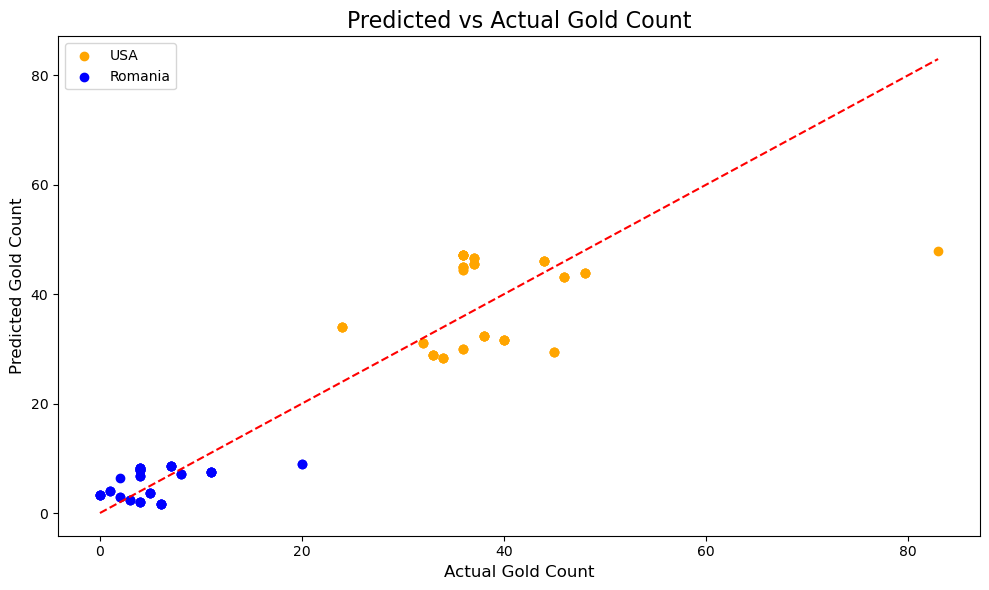

In [10]:
# 比较实际值与预测值
plt.figure(figsize=(10, 6))

plt.scatter(y_usa_test, y_usa_pred, color='orange', label='USA')
plt.scatter(y_rou_test, y_rou_pred, color='blue', label='Romania')

plt.plot([0, max(y_usa_test)], [0, max(y_usa_test)], color='red', linestyle='--')  # 理想预测线

plt.title('Predicted vs Actual Gold Count', fontsize=16)
plt.xlabel('Actual Gold Count', fontsize=12)
plt.ylabel('Predicted Gold Count', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()


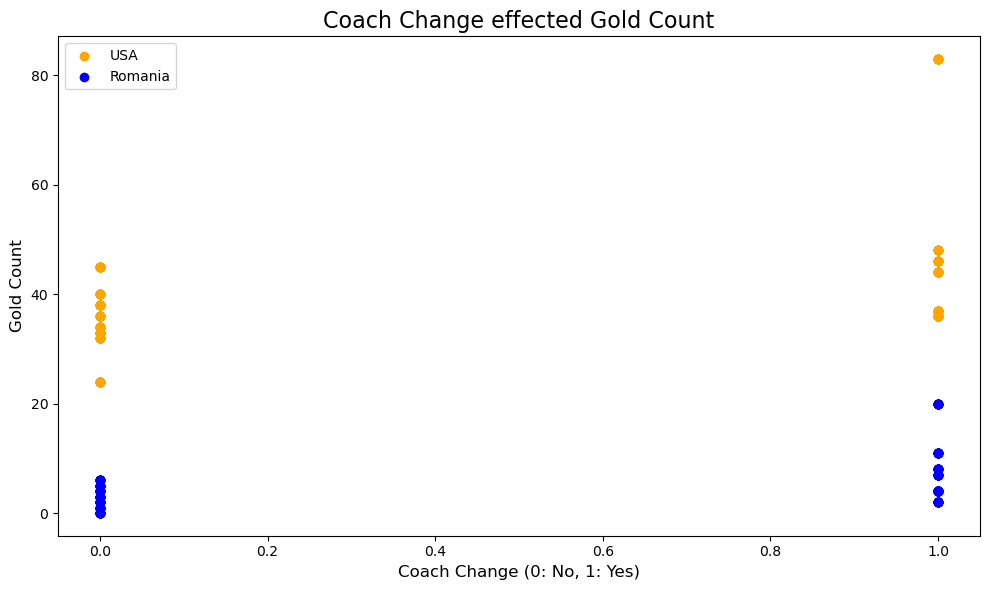

In [12]:
plt.figure(figsize=(10, 6))

# 绘制教练变动与金牌数的关系
plt.scatter(df_usa['coach_change'], df_usa['gold_count'], color='orange', label='USA')
plt.scatter(df_rou['coach_change'], df_rou['gold_count'], color='blue', label='Romania')

plt.title('Coach Change effected Gold Count', fontsize=16)
plt.xlabel('Coach Change (0: No, 1: Yes)', fontsize=12)
plt.ylabel('Gold Count', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()


## Lasso回归结果（gpt）
基于 Lasso 回归模型的输出结果，本研究对美国和罗马尼亚的教练变动效应
进行了深入分析。以下是对模型结果的详细解读：
- （1）美国模型分析
美国模型的回归系数为 [10.328, -3.387]，截距项为 37.800。其中，教练变动
效应的系数为 10.328，表明教练变动对美国运动队表现具有显著的正向影响。具
体而言，教练变动每增加一个单位，运动队的表现评分预计提升约 10.328 分。
这一结果可能反映了美国体育体系中教练角色的重要性，以及优秀教练对运动队
整体表现的显著提升作用。
第二项系数为 -3.387，可能代表了其他控制变量（如运动员年龄、训练条件
等）对运动队表现的负面影响。截距项 37.800 反映了在无教练变动和其他影响
因素的情况下，美国运动队的基础表现水平。
- （2）罗马尼亚模型分析
罗马尼亚模型的回归系数为 [3.845, -1.706]，截距项为 5.371。其中，教练变
动效应的系数为 3.845，表明教练变动对罗马尼亚运动队表现同样具有正向影响，
但影响程度显著低于美国。这一差异可能源于两国在体育资源、训练体系和运动
员培养机制等方面的差异。
第二项系数为 -1.706，表明其他控制变量对罗马尼亚运动队表现的负面影响
相对较小。截距项 5.371 显著低于美国，反映了罗马尼亚运动队在无教练变动和
其他影响因素下的基础表现水平较低。
- （3）教练变动效应对比
通过对比美国和罗马尼亚的教练变动效应系数（美国：10.328，罗马尼亚：
3.845），可以发现教练变动对美国运动队表现的影响更为显著。这一结果可能
与以下因素有关：
 - 体育资源投入：美国在体育领域的资源投入更为充足，优秀教练能够更好地
利用这些资源提升运动队表现。
 - 训练体系成熟度：美国的训练体系更为成熟，教练能够更有效地将先进训练
方法应用于实践。
 - 运动员培养机制：美国运动员培养机制更为完善，优秀教练能够更好地发挥
其指导作用。